<a href="https://colab.research.google.com/github/rahitya-123/Machine-Learning-Algorithms/blob/main/Classification_and_Regression_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification Tree in Scikit-learn**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('data.csv')
#print(data.columns)
X, y = data[['radius_mean','concave points_mean']], data['diagnosis']

In [ ]:
#split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=1)

In [ ]:
#instantiate dt
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

#fit dt to the training set
dt.fit(X_train,y_train)

#predict the test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

#Evaluate the test set accuracy
acc = accuracy_score(y_test,y_pred)
print("Test set accuracy: {:.2f}".format(acc))

['B' 'B' 'B' 'M' 'B']
Test set accuracy: 0.89


In [ ]:
#instantaite the dt_entropy in-order to reduce the impurity/increase the Information gain
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy',random_state=1)
dt_entropy.fit(X_train,y_train)
y_pred = dt_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test,y_pred)
print(f'accuracy achieved using entropy : {accuracy_entropy:.3f}')


#instantaite the dt_gini in-order to reduce the impurity/increase the Information gain
dt_gini = DecisionTreeClassifier(max_depth=8,criterion='gini',random_state=1)
dt_gini.fit(X_train,y_train)
y_pred = dt_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test,y_pred)
print(f'accuracy achieved using gini : {accuracy_gini : .3f}')


accuracy achieved using entropy : 0.886
accuracy achieved using gini :  0.921


**Logistic Regression Model**

In [ ]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [ ]:
# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def plot_labeled_decision_regions(X, y, models):
    # X: DataFrame with two columns
    # y: Series/array of labels
    # models: list of two trained classifiers

    # Convert y to numerical labels if necessary
    le = LabelEncoder() # Move LabelEncoder initialization here
    if not np.issubdtype(y.dtype, np.number):
        y = le.fit_transform(y)

    # Set up meshgrid
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    titles = ['Logistic Regression', 'Decision Tree Classifier']

    for i, model in enumerate(models):
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        # Convert Z to numerical labels if necessary
        # Instead of using le.transform directly, use le.classes_ to map the predictions
        if not np.issubdtype(Z.dtype, np.number):
            Z = np.where(Z == le.classes_[0], 0, 1) # Assuming binary classification

        axes[i].contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
        scatter = axes[i].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.RdBu, edgecolor='k')
        axes[i].set_xlabel(X.columns[0])
        axes[i].set_ylabel(X.columns[1])
        axes[i].set_title(titles[i])
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


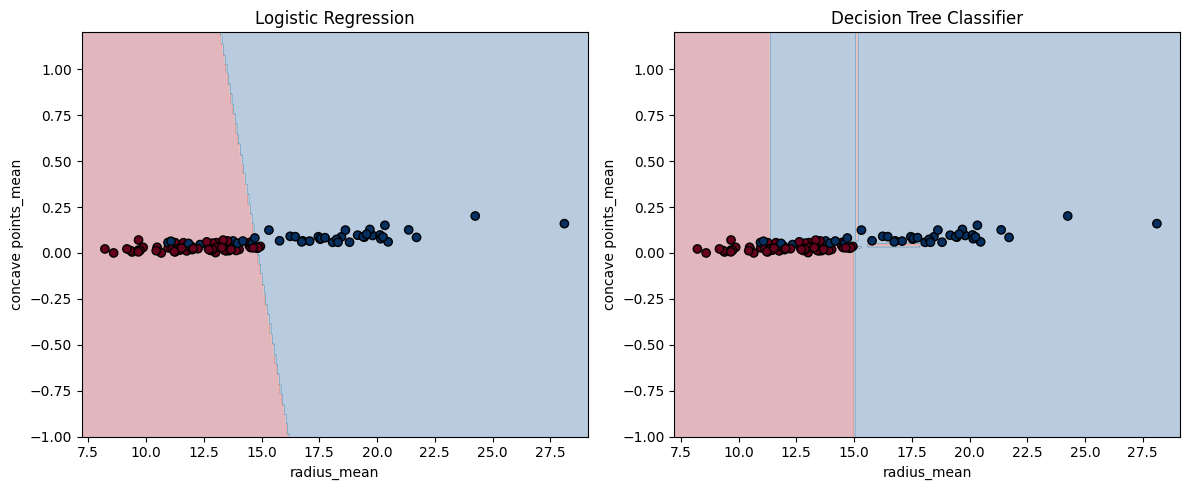

In [ ]:
# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

**Regression Tree Models**

In [ ]:
#converting the .data file extracted from https://archive.ics.uci.edu/dataset/9/auto+mpg website to csv and loading it to df
import pandas as pd

# Define column names
columns = [
    'mpg', 'cylinders', 'displacement', 'horsepower',
    'weight', 'acceleration', 'model_year', 'origin', 'car_name'
]

# Read the data
df = pd.read_csv(
    'auto-mpg.data',
    delim_whitespace=True,
    names=columns,
    na_values='?',          # Handle missing values
    quotechar='"',          # Handle quoted car names
    comment='\t',           # Ignore tabbed comments if any
    skipinitialspace=True   # Skip spaces after delimiter
)

# Save as CSV
df.to_csv('auto-mpg.csv', index=False)

<ipython-input-12-3fdc0f183124>:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


In [ ]:
#seeing the df data to get an overview of the dataset
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin                   car_name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


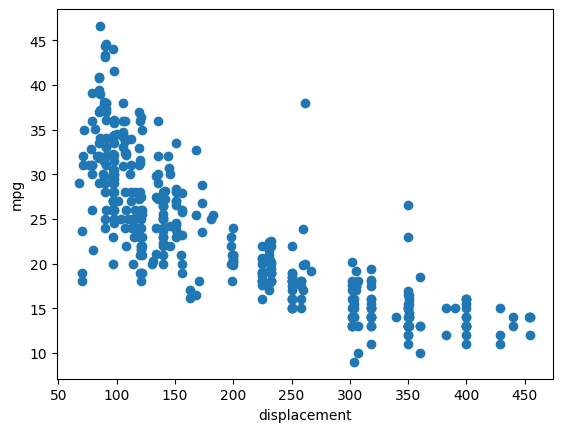

In [ ]:
#create a scatter plot between mp and displacement variables to see if the relationship is linear or non-linear
import matplotlib.pyplot as plt

plt.scatter(df['displacement'],df['mpg'])
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.show()

In [ ]:
#import DecisionTreeregressor
from sklearn.tree import DecisionTreeRegressor
#import train_test_split
from sklearn.model_selection import train_test_split
#import mean_squared_error as mse
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
X,y = df[['displacement']],df['mpg']
#split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [ ]:
#instantiate a decisiontreeregressor
dtr=DecisionTreeRegressor(max_depth=8,min_samples_leaf=0.13,random_state=3)

#fit 'dtr' to the training set
dtr.fit(X_train, y_train)

#predict test-set labels
y_pred = dtr.predict(X_test)

#compute test-set MSE
mse_dtr = MSE(y_test,y_pred)
# compute test-set rmse
rmse_dtr = mse_dtr**(1/2)
print("Test set RMSE of dt: {:.2f}".format(rmse_dtr))


Test set RMSE of dt: 4.69


In [ ]:
# comparision of Linear Regression Model outcome with Regression Tree Model outcome

#import Linearregression
from sklearn.linear_model import LinearRegression
# instantiate a linearregreesion
lr = LinearRegression()
# fit 'lr' to the training set
lr.fit(X_train,y_train)
# predict test set labels
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test,y_pred_lr)
#compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print("Test set RMSE of lr: {:.2f}".format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dtr))

Test set RMSE of lr: 4.74
Regression Tree test set RMSE: 4.69


In [ ]:
X,y = df[['displacement']],df['mpg']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

# Set the style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# Define column names based on the dataset description
columns = [
    'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
    'acceleration', 'model_year', 'origin', 'car_name'
]

# Read the data using a custom parse function to handle the unusual format
def parse_line(line):
    parts = line.strip().split('\t')
    numeric_part = parts[0].split()
    car_name = parts[1].strip('"') if len(parts) > 1 else ""

    return {
        'mpg': float(numeric_part[0]),
        'cylinders': int(numeric_part[1]),
        'displacement': float(numeric_part[2]),
        'horsepower': numeric_part[3] if numeric_part[3] != '?' else np.nan,
        'weight': float(numeric_part[4]),
        'acceleration': float(numeric_part[5]),
        'model_year': int(numeric_part[6]),
        'origin': int(numeric_part[7]),
        'car_name': car_name
    }

# Read and parse the data file
with open('auto-mpg.data', 'r') as file:
    lines = file.readlines()

# Create a list of dictionaries from the parsed lines
data = []
for line in lines:
    if line.strip():  # Skip empty lines
        try:
            data.append(parse_line(line))
        except Exception as e:
            print(f"Error parsing line: {line}")
            print(f"Error details: {e}")

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Convert horsepower to numeric
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Display some initial information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nSummary statistics:")
print(df.describe())
print("\nMissing values:")
print(df.isna().sum())

# Add region names based on origin codes
origin_names = {1: 'American', 2: 'European', 3: 'Japanese'}
df['region'] = df['origin'].map(origin_names)

# Data preprocessing for clustering
# 1. Select relevant features for clustering
features = ['mpg', 'weight', 'horsepower', 'displacement']
X = df[features].copy()

# 2. Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# 3. Standardize the features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Create a DataFrame of the scaled data for easier manipulation
X_df = pd.DataFrame(X_scaled, columns=features)

# Correlation analysis
plt.figure(figsize=(10, 8))
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Features')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.close()

# Dimensionality reduction with PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['region'] = df['region'].values
pca_df['car_name'] = df['car_name'].values
pca_df['model_year'] = df['model_year'].values

# Visualize data after PCA reduction colored by region
plt.figure(figsize=(12, 8))
for region, color in zip(['American', 'European', 'Japanese'], ['red', 'blue', 'green']):
    mask = pca_df['region'] == region
    plt.scatter(pca_df.loc[mask, 'PC1'], pca_df.loc[mask, 'PC2'], c=color, label=region, alpha=0.7)

plt.title('PCA Projection of Auto Data by Region of Origin')
plt.xlabel(f'Principal Component 1 (Explained Variance: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'Principal Component 2 (Explained Variance: {pca.explained_variance_ratio_[1]:.2%})')
plt.legend()
plt.grid(True)
plt.savefig('pca_by_region.png')
plt.close()

# Determine optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares
silhouette_scores = []
max_clusters = 10

for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot the Elbow Method results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.savefig('optimal_clusters.png')
plt.close()

# Based on our analysis and domain knowledge, we'll use 3 clusters
# Perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the clusters
cluster_stats = df.groupby('cluster').agg({
    'mpg': 'mean',
    'weight': 'mean',
    'horsepower': 'mean',
    'displacement': 'mean',
    'car_name': 'count'
}).rename(columns={'car_name': 'count'})

print("\nCluster Statistics:")
print(cluster_stats)

# Analyze distribution of regions within each cluster
region_distribution = pd.crosstab(df['cluster'], df['region'], normalize='index') * 100
print("\nRegion Distribution within Clusters (%):")
print(region_distribution)

# Visualize clusters in the PCA space
plt.figure(figsize=(12, 8))
for cluster_id in range(3):
    mask = df['cluster'] == cluster_id
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f'Cluster {cluster_id}', alpha=0.7)

# Plot cluster centers projected onto PCA space
centers = kmeans.cluster_centers_
centers_pca = pca.transform(centers)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=300, c='black', marker='*', label='Centroids')

plt.title('K-means Clustering Results (k=3) Projected onto PCA Space')
plt.xlabel(f'Principal Component 1 (Explained Variance: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'Principal Component 2 (Explained Variance: {pca.explained_variance_ratio_[1]:.2%})')
plt.legend()
plt.grid(True)
plt.savefig('kmeans_clusters.png')
plt.close()

# Visualize clusters with respect to key features (not in PCA space)
plt.figure(figsize=(14, 10))

# Plot MPG vs Weight
plt.subplot(2, 2, 1)
for cluster_id in range(3):
    mask = df['cluster'] == cluster_id
    plt.scatter(df.loc[mask, 'weight'], df.loc[mask, 'mpg'], label=f'Cluster {cluster_id}', alpha=0.7)
plt.title('MPG vs Weight by Cluster')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.legend()
plt.grid(True)

# Plot MPG vs Horsepower
plt.subplot(2, 2, 2)
for cluster_id in range(3):
    mask = df['cluster'] == cluster_id
    plt.scatter(df.loc[mask, 'horsepower'], df.loc[mask, 'mpg'], label=f'Cluster {cluster_id}', alpha=0.7)
plt.title('MPG vs Horsepower by Cluster')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.grid(True)

# Plot Horsepower vs Weight
plt.subplot(2, 2, 3)
for cluster_id in range(3):
    mask = df['cluster'] == cluster_id
    plt.scatter(df.loc[mask, 'weight'], df.loc[mask, 'horsepower'], label=f'Cluster {cluster_id}', alpha=0.7)
plt.title('Horsepower vs Weight by Cluster')
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.legend()
plt.grid(True)

# Plot MPG vs Displacement
plt.subplot(2, 2, 4)
for cluster_id in range(3):
    mask = df['cluster'] == cluster_id
    plt.scatter(df.loc[mask, 'displacement'], df.loc[mask, 'mpg'], label=f'Cluster {cluster_id}', alpha=0.7)
plt.title('MPG vs Displacement by Cluster')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('cluster_feature_plots.png')
plt.close()

# Perform hierarchical clustering
# Compute the linkage matrix
Z = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(14, 8))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12.)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.axhline(y=5, color='r', linestyle='--', alpha=0.5)  # Line to suggest where to cut the dendrogram
plt.savefig('dendrogram.png')
plt.close()

# Sample cars from each cluster
sample_cars = df.groupby('cluster').apply(
    lambda x: x.nlargest(5, 'mpg')['car_name'].tolist() + x.nsmallest(5, 'mpg')['car_name'].tolist()
)

print("\nSample cars from each cluster:")
for cluster_id, cars in sample_cars.items():
    print(f"\nCluster {cluster_id} (showing highest and lowest MPG examples):")
    for car in cars:
        print(f"- {car}")

# Analyze clusters by model year
year_distribution = pd.crosstab(df['cluster'], df['model_year'], normalize='index') * 100
print("\nModel Year Distribution within Clusters (%):")
print(year_distribution)

# Compare clustering results with PCA
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('Clusters Projected onto PCA Space')
plt.xlabel(f'Principal Component 1 (Explained Variance: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'Principal Component 2 (Explained Variance: {pca.explained_variance_ratio_[1]:.2%})')
plt.grid(True)
plt.savefig('pca_with_clusters.png')
plt.close()

# Calculate feature importances for each cluster (distance from overall mean)
overall_mean = X_df.mean()
feature_importance = pd.DataFrame()

for cluster_id in range(3):
    cluster_mean = X_df[df['cluster'] == cluster_id].mean()
    feature_importance[f'Cluster {cluster_id}'] = abs(cluster_mean - overall_mean)

# Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance for Cluster Separation')
plt.xlabel('Feature')
plt.ylabel('Absolute Distance from Overall Mean')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.close()

print("\nFeature importance for cluster separation:")
print(feature_importance)

print("\nClustering analysis complete. Results saved as PNG files.")

Dataset shape: (398, 9)

First few rows:
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin                   car_name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  

Summary statistics:
              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.42462

<ipython-input-20-f0fb470d4481>:259: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_cars = df.groupby('cluster').apply(



Sample cars from each cluster:

Cluster 0 (showing highest and lowest MPG examples):
- mazda glc
- honda civic 1500 gl
- vw rabbit c (diesel)
- vw pickup
- vw dasher (diesel)
- mercury capri 2000
- volkswagen type 3
- mazda rx-7 gs
- audi 100 ls
- toyota corona hardtop

Cluster 1 (showing highest and lowest MPG examples):
- cadillac eldorado
- mercury monarch ghia
- dodge diplomat
- chevrolet monte carlo landau
- chrysler lebaron town @ country (sw)
- hi 1200d
- ford f250
- chevy c20
- dodge d200
- mercury marquis

Cluster 2 (showing highest and lowest MPG examples):
- datsun 280-zx
- chevrolet citation
- peugeot 505s turbo diesel
- dodge colt
- peugeot 504
- chevrolet nova
- mercury monarch
- ford maverick
- amc matador
- plymouth satellite custom

Model Year Distribution within Clusters (%):
model_year         70        71         72         73        74         75  \
cluster                                                                      
0            3.205128  7.692308   4.48

<Figure size 1000x600 with 0 Axes>